# 01 - Khám phá dữ liệu HR Analytics: Job Change

Mục tiêu notebook:

- Đọc và quan sát sơ bộ dữ liệu.
- Trả lời một số **câu hỏi phân tích dữ liệu**, ví dụ:
  - Ứng viên thuộc ngành nào có xu hướng đổi việc nhiều hơn?
  - Kinh nghiệm ít/nhiều có ảnh hưởng đến việc muốn đổi việc?
  - Giới tính, trình độ học vấn, loại trường, loại công ty có khác biệt gì về `target`?
- Vẽ các biểu đồ đơn giản bằng **Matplotlib + Seaborn**.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# ====== SETUP ĐƯỜNG DẪN ======
BASE_DIR = os.path.abspath("..")
sys.path.append(BASE_DIR)

DATA_PATH = os.path.join(BASE_DIR, "data", "raw", "aug_train.csv")

# Import functions
from src.data_processing import load_data, validate_data_values, compute_descriptive_statistics, statistical_hypothesis_test_numpy
from src.visualization import *

print("="*70)
print("HR ANALYTICS: PHÂN TÍCH DỮ LIỆU ĐỔI VIỆC DATA SCIENTISTS")
print("="*70)

# Load data
print("ĐANG LOAD DỮ LIỆU...")
train_data = load_data(DATA_PATH)

if train_data is None:
    print("KHÔNG THỂ LOAD DỮ LIỆU")
else:
    print(f"DỮ LIỆU ĐÃ LOAD: {train_data.shape}")
    print(f"SỐ LƯỢNG: {len(train_data)} mẫu, {len(train_data.dtype.names)} cột")

HR ANALYTICS: PHÂN TÍCH DỮ LIỆU ĐỔI VIỆC DATA SCIENTISTS
DANG LOAD DU LIEU...
Loading data from: d:\HOCTAP\LTKHDL\23120063\23120063\data\raw\aug_train.csv
Found 19158 data rows with 14 columns
Successfully loaded data with shape: (19158,)

Column information:
  gender: [np.str_('Female'), np.str_('Male'), np.str_('Other'), np.str_('nan')]
  relevent_experience: [np.str_('Has relevent experience'), np.str_('No relevent experience')]
  enrolled_university: [np.str_('Full time course'), np.str_('Part time course'), np.str_('nan'), np.str_('no_enrollment')]
  education_level: [np.str_('Graduate'), np.str_('High School'), np.str_('Masters'), np.str_('Phd'), np.str_('Primary School'), np.str_('nan')]
  major_discipline: [np.str_('Arts'), np.str_('Business Degree'), np.str_('Humanities'), np.str_('No Major'), np.str_('Other'), np.str_('STEM'), np.str_('nan')]
  company_size: [np.str_('10/49'), np.str_('100-500'), np.str_('1000-4999'), np.str_('10000+'), np.str_('50-99'), np.str_('500-999'), n

## TỔNG QUAN DATASET


In [2]:
def question_1_overview(data):
    """Câu hỏi 1: Tổng quan về dataset"""
    print("\n" + "CÂU HỎI 1: TỔNG QUAN DATASET")
    print("-" * 50)
    
    # Basic info
    print("THÔNG TIN CƠ BẢN:")
    print(f"   • Số lượng mẫu: {len(data):,}")
    print(f"   • Số features: {len(data.dtype.names)}")
    print(f"   • Columns: {list(data.dtype.names)}")
    
    # Data types
    print("\nKIỂU DỮ LIỆU:")
    numeric_cols = []
    categorical_cols = []
    
    for col in data.dtype.names:
        if np.issubdtype(data[col].dtype, np.number):
            numeric_cols.append(col)
            dtype_info = "Số"
        else:
            categorical_cols.append(col)
            dtype_info = "Chữ"
        print(f"   • {col:25} : {dtype_info}")
    
    print(f"\n   → Tổng số features số: {len(numeric_cols)}")
    print(f"   → Tổng số features chữ: {len(categorical_cols)}")
    
    # Missing values analysis
    print("\nPHÂN TÍCH MISSING VALUES:")
    total_missing = 0
    has_missing = False
    
    for col in data.dtype.names:
        if np.issubdtype(data[col].dtype, np.number):
            missing = np.sum(np.isnan(data[col]))
        else:
            missing = np.sum(data[col] == 'nan')
        
        if missing > 0:
            percentage = (missing / len(data)) * 100
            print(f"   • {col:25} : {missing:>4} values ({percentage:5.1f}%)")
            total_missing += missing
            has_missing = True
    
    if not has_missing:
        print("   KHÔNG CÓ MISSING VALUES")
    else:
        total_percentage = (total_missing / (len(data) * len(data.dtype.names))) * 100
        print(f"   → Tổng số missing values: {total_missing}")
        print(f"   → Tỷ lệ missing toàn dataset: {total_percentage:.2f}%")

# Chạy phân tích
if train_data is not None:
    question_1_overview(train_data)


CÂU HỎI 1: TỔNG QUAN DATASET
--------------------------------------------------
THÔNG TIN CƠ BẢN:
   • Số lượng mẫu: 19,158
   • Số features: 14
   • Columns: ['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']

KIỂU DỮ LIỆU:
   • enrollee_id               : Số
   • city                      : Chữ
   • city_development_index    : Số
   • gender                    : Chữ
   • relevent_experience       : Chữ
   • enrolled_university       : Chữ
   • education_level           : Chữ
   • major_discipline          : Chữ
   • experience                : Số
   • company_size              : Chữ
   • company_type              : Chữ
   • last_new_job              : Số
   • training_hours            : Số
   • target                    : Số

   → Tổng số features số: 6
   → Tổng số features chữ: 8

PHÂN TÍCH MISSING V

## Câu hỏi 1: Phân phối của biến mục tiêu (target) như thế nào?



CÂU HỎI 1: PHÂN PHỐI CỦA BIẾN MỤC TIÊU
--------------------------------------------------
KẾT QUẢ PHÂN PHỐI:
   • KHÔNG ĐỔI VIỆC: 14381 mẫu (75.07%)
   • ĐỔI VIỆC: 4777 mẫu (24.93%)

PHÂN TÍCH IMBALANCE:
   • Imbalance ratio: 3.01:1
   • Tỷ lệ đổi việc: 24.93%
   → CẢNH BÁO: Dataset có imbalance nghiêm trọng!


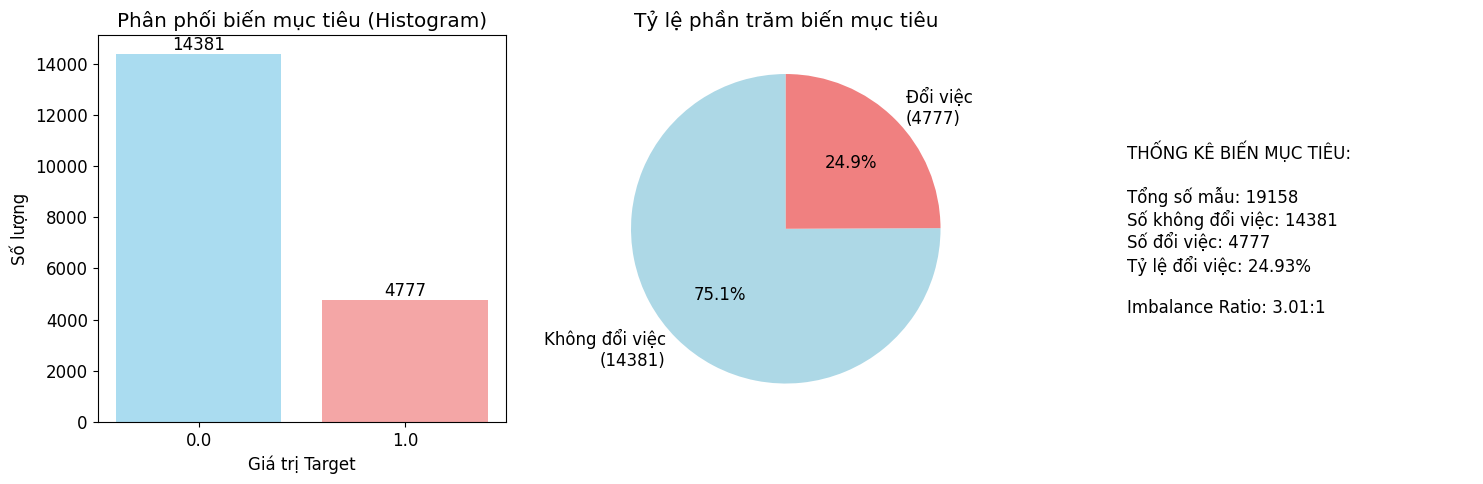

In [3]:
def question_1_target_distribution(data):
    """Câu hỏi 1: Phân phối của biến mục tiêu"""
    print("\n" + "CÂU HỎI 1: PHÂN PHỐI CỦA BIẾN MỤC TIÊU")
    print("-" * 50)
    
    if 'target' not in data.dtype.names:
        print("Không tìm thấy cột target")
        return
    
    target = data['target']
    clean_target = target[~np.isnan(target)]
    unique_vals, counts = np.unique(clean_target, return_counts=True)
    total = len(clean_target)
    
    print("KẾT QUẢ PHÂN PHỐI:")
    for val, count in zip(unique_vals, counts):
        percentage = (count / total) * 100
        status = "ĐỔI VIỆC" if val == 1 else "KHÔNG ĐỔI VIỆC"
        print(f"   • {status}: {count} mẫu ({percentage:.2f}%)")
    
    if len(counts) == 2:
        imbalance_ratio = counts[0] / counts[1]
        print(f"\nPHÂN TÍCH IMBALANCE:")
        print(f"   • Imbalance ratio: {imbalance_ratio:.2f}:1")
        print(f"   • Tỷ lệ đổi việc: {counts[1]/total*100:.2f}%")
        
        if imbalance_ratio > 3:
            print("   → CẢNH BÁO: Dataset có imbalance nghiêm trọng!")
        elif imbalance_ratio > 2:
            print("   → CẢNH BÁO: Dataset có imbalance đáng kể")
    
    # Visualization
    plot_target_distribution(data)
    return imbalance_ratio

if train_data is not None:
    imbalance_ratio = question_1_target_distribution(train_data)

## Câu hỏi 2: Các yếu tố nhân khẩu học ảnh hưởng thế nào đến quyết định đổi việc?



CÂU HỎI 2: YẾU TỐ NHÂN KHẨU HỌC
--------------------------------------------------
PHÂN TÍCH ẢNH HƯỞNG CỦA CÁC YẾU TỐ NHÂN KHẨU HỌC:

GENDER:
   • Female                   :  26.3% đổi việc
   • Male                     :  22.8% đổi việc
   • Other                    :  26.2% đổi việc
   → Cao nhất: Female (26.3%)
   → Thấp nhất: Male (22.8%)

EDUCATION_LEVEL:
   • Graduate                 :  28.0% đổi việc
   • High School              :  19.5% đổi việc
   • Masters                  :  21.4% đổi việc
   • Phd                      :  14.0% đổi việc
   • Primary School           :  13.3% đổi việc
   → Cao nhất: Graduate (28.0%)
   → Thấp nhất: Primary School (13.3%)

ENROLLED_UNIVERSITY:
   • Full time course         :  38.1% đổi việc
   • Part time course         :  25.2% đổi việc
   • no_enrollment            :  21.1% đổi việc
   → Cao nhất: Full time course (38.1%)
   → Thấp nhất: no_enrollment (21.1%)

MAJOR_DISCIPLINE:
   • Arts                     :  20.9% đổi việc
   • Business 

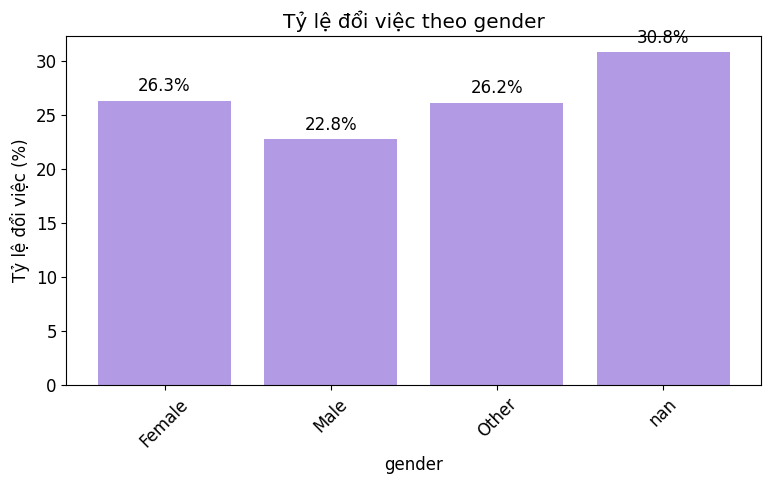

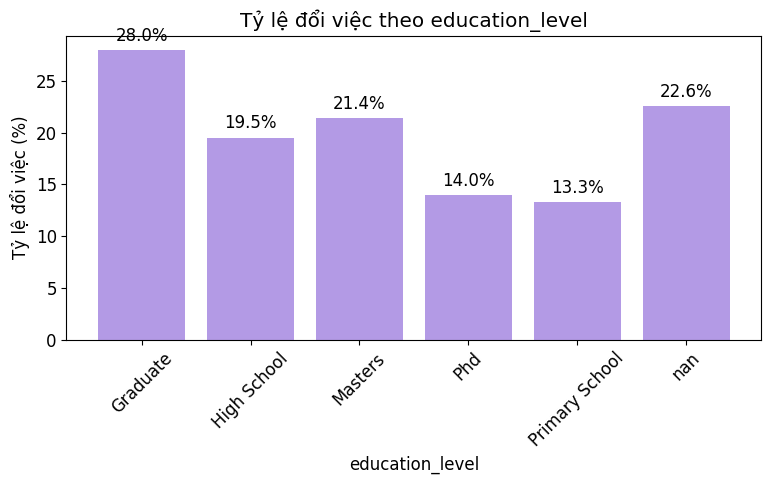

In [4]:
def question_2_demographic_factors(data):
    """Câu hỏi 2: Ảnh hưởng của yếu tố nhân khẩu học"""
    print("\n" + "CÂU HỎI 2: YẾU TỐ NHÂN KHẨU HỌC")
    print("-" * 50)
    
    demographic_cols = ['gender', 'education_level', 'enrolled_university', 'major_discipline']
    
    print("PHÂN TÍCH ẢNH HƯỞNG CỦA CÁC YẾU TỐ NHÂN KHẨU HỌC:")
    
    for col in demographic_cols:
        if col in data.dtype.names:
            print(f"\n{col.upper()}:")
            unique_vals = np.unique(data[col])
            
            # Tính tỷ lệ đổi việc cho từng nhóm
            change_rates = {}
            for val in unique_vals:
                if val != 'nan':
                    mask = data[col] == val
                    total_in_group = np.sum(mask)
                    if total_in_group > 0:
                        change_count = np.sum((mask) & (data['target'] == 1))
                        change_rate = (change_count / total_in_group) * 100
                        change_rates[val] = change_rate
                        print(f"   • {str(val):25}: {change_rate:5.1f}% đổi việc")
            
            # Tìm nhóm có tỷ lệ đổi việc cao nhất và thấp nhất
            if change_rates:
                max_group = max(change_rates, key=change_rates.get)
                min_group = min(change_rates, key=change_rates.get)
                print(f"   → Cao nhất: {max_group} ({change_rates[max_group]:.1f}%)")
                print(f"   → Thấp nhất: {min_group} ({change_rates[min_group]:.1f}%)")
    
    # Visualization cho các biến quan trọng
    important_demographic = ['gender', 'education_level']
    for col in important_demographic:
        if col in data.dtype.names:
            plot_feature_vs_target(data, col)

if train_data is not None:
    question_2_demographic_factors(train_data)

## Câu hỏi 3: Chỉ số phát triển thành phố (city_development_index) ảnh hưởng thế nào?


CÂU HỎI 3: ẢNH HƯỞNG CITY DEVELOPMENT INDEX
--------------------------------------------------
PHÂN TÍCH THỐNG KÊ:
   • CDI trung bình (không đổi việc): 0.853
   • CDI trung bình (có đổi việc): 0.756
   • Chênh lệch: 0.097

KIỂM ĐỊNH THỐNG KÊ:
   • t-statistic: 178.288
   • p-value: -1.3999
   → KẾT LUẬN: CÓ sự khác biệt có ý nghĩa thống kê!
   → Người không đổi việc có CDI CAO HƠN

PHÂN TÍCH THEO MỨC ĐỘ PHÁT TRIỂN:
   • Rất thấp    :  57.9% đổi việc
   • Thấp        :  49.7% đổi việc
   • Trung bình  :  24.7% đổi việc
   • Cao         :  13.6% đổi việc
   • Rất cao     :  16.8% đổi việc


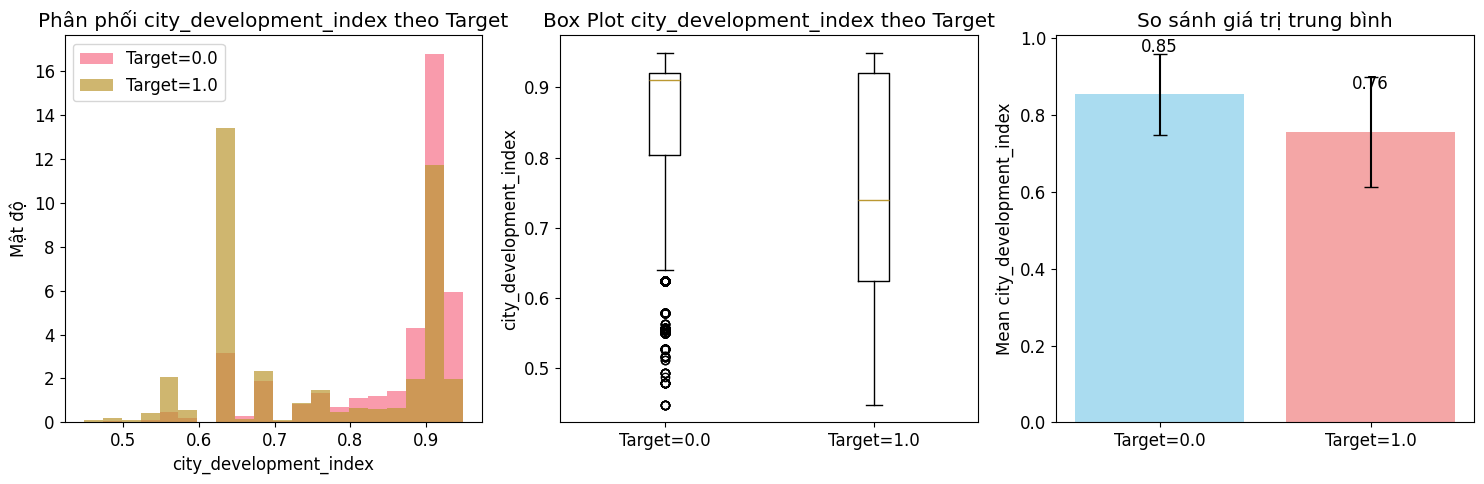

In [5]:
def question_3_city_development_impact(data):
    """Câu hỏi 3: Ảnh hưởng của chỉ số phát triển thành phố"""
    print("\n" + "CÂU HỎI 3: ẢNH HƯỞNG CITY DEVELOPMENT INDEX")
    print("-" * 50)
    
    if 'city_development_index' not in data.dtype.names:
        return
    
    cdi = data['city_development_index']
    target = data['target']
    
    # Phân tích thống kê
    cdi_no_change = cdi[target == 0]
    cdi_change = cdi[target == 1]
    
    print("PHÂN TÍCH THỐNG KÊ:")
    print(f"   • CDI trung bình (không đổi việc): {np.nanmean(cdi_no_change):.3f}")
    print(f"   • CDI trung bình (có đổi việc): {np.nanmean(cdi_change):.3f}")
    print(f"   • Chênh lệch: {np.nanmean(cdi_no_change) - np.nanmean(cdi_change):.3f}")
    
    # Kiểm định thống kê
    result = statistical_hypothesis_test_numpy(data, 'city_development_index', 'target')
    if result:
        print(f"\nKIỂM ĐỊNH THỐNG KÊ:")
        print(f"   • t-statistic: {result['t_statistic']:.3f}")
        print(f"   • p-value: {result['p_value']:.4f}")
        
        if result['p_value'] < 0.05:
            print("   → KẾT LUẬN: CÓ sự khác biệt có ý nghĩa thống kê!")
            direction = "CAO HƠN" if result['mean_difference'] > 0 else "THẤP HƠN"
            print(f"   → Người không đổi việc có CDI {direction}")
        else:
            print("   → KẾT LUẬN: KHÔNG có sự khác biệt có ý nghĩa thống kê")
    
    # Phân tích theo mức độ phát triển
    print("\nPHÂN TÍCH THEO MỨC ĐỘ PHÁT TRIỂN:")
    bins = [0, 0.6, 0.7, 0.8, 0.9, 1.0]
    labels = ['Rất thấp', 'Thấp', 'Trung bình', 'Cao', 'Rất cao']
    
    for i in range(len(bins)-1):
        mask = (cdi >= bins[i]) & (cdi < bins[i+1])
        total_in_bin = np.sum(mask)
        if total_in_bin > 0:
            change_rate = np.sum(target[mask] == 1) / total_in_bin * 100
            print(f"   • {labels[i]:12}: {change_rate:5.1f}% đổi việc")
    
    # Visualization
    plot_feature_vs_target(data, 'city_development_index')

if train_data is not None:
    question_3_city_development_impact(train_data)

## Câu hỏi 4: Kinh nghiệm và đào tạo ảnh hưởng thế nào đến quyết định?



CÂU HỎI 4: ẢNH HƯỞNG KINH NGHIỆM VÀ ĐÀO TẠO
--------------------------------------------------
PHÂN TÍCH KINH NGHIỆM LÀM VIỆC:
   • Mới vào nghề (<2 năm)    :  38.4% đổi việc
   • Có kinh nghiệm (3-5 năm) :  32.2% đổi việc
   • Kinh nghiệm (6-10 năm)   :  25.2% đổi việc
   • Lâu năm (>10 năm)        :  16.9% đổi việc

PHÂN TÍCH THỜI GIAN ĐÀO TẠO:
   • Training hours trung bình (không đổi việc): 66.1 giờ
   • Training hours trung bình (có đổi việc): 63.1 giờ
   • 0-10h     :  25.2% đổi việc
   • 11-30h    :  25.4% đổi việc
   • 31-50h    :  25.6% đổi việc
   • 51-100h   :  24.9% đổi việc
   • 101-200h  :  24.8% đổi việc
   • 201+h     :  20.1% đổi việc
   → Nhóm có tỷ lệ đổi việc cao nhất: 31-50h (25.6%)


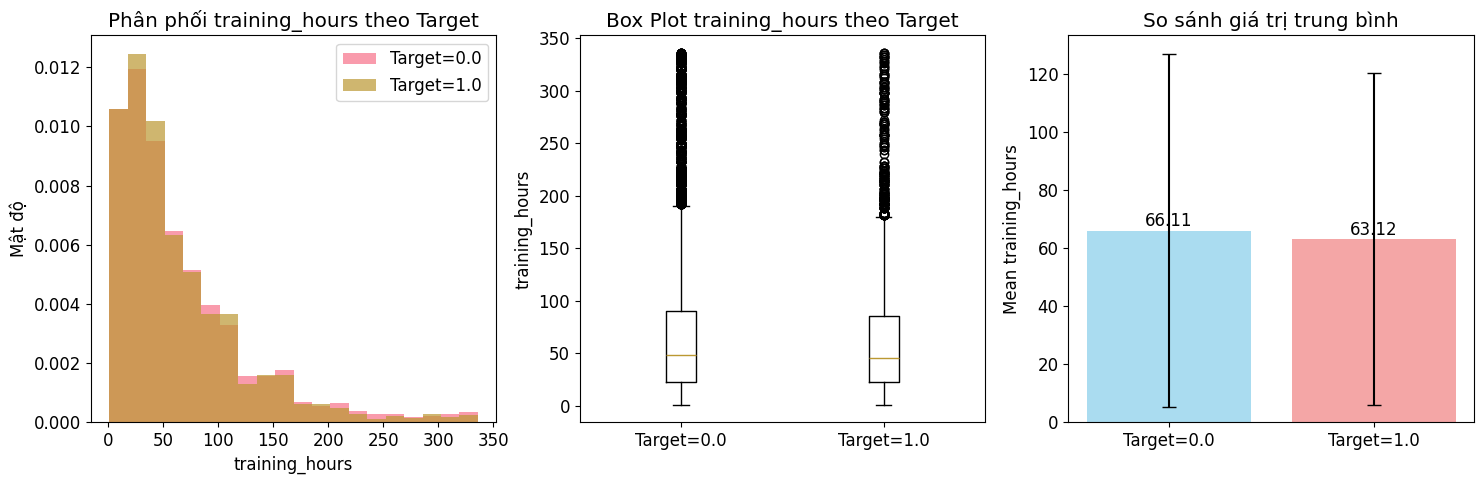

In [6]:
def question_4_experience_training_impact(data):
    """Câu hỏi 4: Ảnh hưởng của kinh nghiệm và đào tạo"""
    print("\n" + "CÂU HỎI 4: ẢNH HƯỞNG KINH NGHIỆM VÀ ĐÀO TẠO")
    print("-" * 50)
    
    # Phân tích kinh nghiệm làm việc
    if 'experience' in data.dtype.names:
        experience = data['experience']
        target = data['target']
        
        print("PHÂN TÍCH KINH NGHIỆM LÀM VIỆC:")
        exp_groups = {
            'Mới vào nghề (<2 năm)': [0, 1, 2],
            'Có kinh nghiệm (3-5 năm)': [3, 4, 5],
            'Kinh nghiệm (6-10 năm)': [6, 7, 8, 9, 10],
            'Lâu năm (>10 năm)': list(range(11, 22))
        }
        
        for group_name, years in exp_groups.items():
            mask = np.isin(experience, years)
            total_in_group = np.sum(mask)
            if total_in_group > 0:
                change_rate = np.sum(target[mask] == 1) / total_in_group * 100
                print(f"   • {group_name:25}: {change_rate:5.1f}% đổi việc")
    
    # Phân tích thời gian đào tạo
    if 'training_hours' in data.dtype.names:
        training_hours = data['training_hours']
        target = data['target']
        
        print("\nPHÂN TÍCH THỜI GIAN ĐÀO TẠO:")
        print(f"   • Training hours trung bình (không đổi việc): {np.nanmean(training_hours[target == 0]):.1f} giờ")
        print(f"   • Training hours trung bình (có đổi việc): {np.nanmean(training_hours[target == 1]):.1f} giờ")
        
        # Phân tích theo nhóm training hours
        bins = [0, 10, 30, 50, 100, 200, 500]
        labels = ['0-10h', '11-30h', '31-50h', '51-100h', '101-200h', '201+h']
        
        change_rates = []
        for i in range(len(bins)-1):
            mask = (training_hours >= bins[i]) & (training_hours < bins[i+1])
            total_in_group = np.sum(mask)
            if total_in_group > 0:
                change_rate = np.sum(target[mask] == 1) / total_in_group * 100
                change_rates.append(change_rate)
                print(f"   • {labels[i]:10}: {change_rate:5.1f}% đổi việc")
        
        # Tìm nhóm có tỷ lệ đổi việc cao nhất
        if change_rates:
            max_idx = np.argmax(change_rates)
            print(f"   → Nhóm có tỷ lệ đổi việc cao nhất: {labels[max_idx]} ({change_rates[max_idx]:.1f}%)")
    
    # Visualization
    if 'training_hours' in data.dtype.names:
        plot_feature_vs_target(data, 'training_hours')

if train_data is not None:
    question_4_experience_training_impact(train_data)

## Câu hỏi 5: Có sự khác biệt về đặc điểm giữa người đổi việc và không đổi việc?


CÂU HỎI 5: SỰ KHÁC BIỆT VỀ ĐẶC ĐIỂM GIỮA HAI NHÓM
------------------------------------------------------------
SO SÁNH ĐẶC ĐIỂM GIỮA NGƯỜI ĐỔI VIỆC VÀ KHÔNG ĐỔI VIỆC:
BIẾN                      |  KHÔNG ĐỔI |     CÓ ĐỔI |   CHÊNH LỆCH |    p-value | Ý NGHĨA TK
------------------------------------------------------------------------------------------
city_development_index    |      0.853 |      0.756 |        0.097 |    -1.3999 |        CÓ
experience                |     10.790 |      8.020 |        2.770 |    -0.9580 |        CÓ
last_new_job              |      2.080 |      1.759 |        0.321 |    -2.2038 |        CÓ
training_hours            |     66.114 |     63.118 |        2.995 |    -1.7013 |        CÓ
------------------------------------------------------------------------------------------

TỔNG KẾT SỰ KHÁC BIỆT:
   • Số biến có khác biệt có ý nghĩa: 4/4

CÁC BIẾN CÓ SỰ KHÁC BIỆT CÓ Ý NGHĨA THỐNG KÊ:
   • city_development_index: Người không đổi việc có giá trị CAO HƠN (0.097)

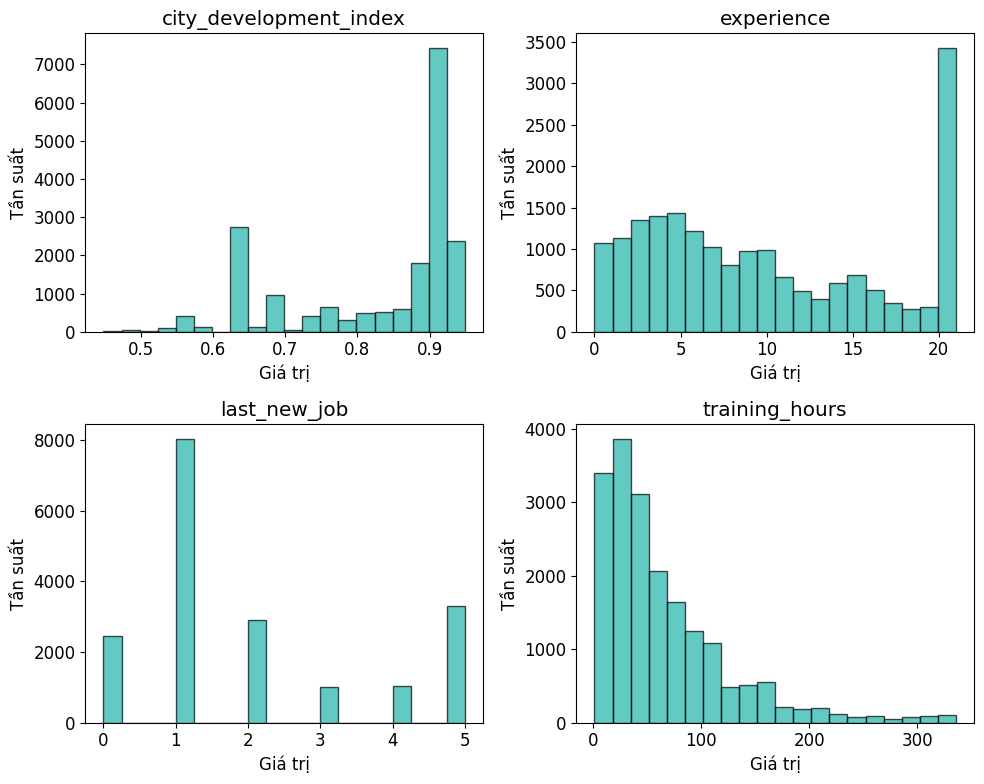

In [7]:
def question_5_group_comparison(data):
    """Câu hỏi 5: Sự khác biệt về đặc điểm giữa hai nhóm"""
    print("\n" + "CÂU HỎI 5: SỰ KHÁC BIỆT VỀ ĐẶC ĐIỂM GIỮA HAI NHÓM")
    print("-" * 60)
    
    if 'target' not in data.dtype.names:
        return
    
    print("SO SÁNH ĐẶC ĐIỂM GIỮA NGƯỜI ĐỔI VIỆC VÀ KHÔNG ĐỔI VIỆC:")
    print("=" * 90)
    print(f"{'BIẾN':25} | {'KHÔNG ĐỔI':>10} | {'CÓ ĐỔI':>10} | {'CHÊNH LỆCH':>12} | {'p-value':>10} | {'Ý NGHĨA TK'}")
    print("-" * 90)
    
    # Chọn các biến numeric để so sánh
    numeric_cols = []
    for col in data.dtype.names:
        if (np.issubdtype(data[col].dtype, np.number) and 
            col not in ['target', 'enrollee_id']):
            numeric_cols.append(col)
    
    significant_features = []
    
    for col in numeric_cols[:8]:  # Giới hạn 8 biến để hiển thị
        # Tính giá trị trung bình cho từng nhóm
        mean_no_change = np.nanmean(data[col][data['target'] == 0])
        mean_change = np.nanmean(data[col][data['target'] == 1])
        mean_diff = mean_no_change - mean_change
        
        # Kiểm định thống kê
        result = statistical_hypothesis_test_numpy(data, col, 'target')
        
        if result:
            p_value = result['p_value']
            significance = "CÓ" if p_value < 0.05 else "KHÔNG"
            
            if p_value < 0.05:
                significant_features.append((col, mean_diff))
            
            print(f"{col:25} | {mean_no_change:10.3f} | {mean_change:10.3f} | {mean_diff:12.3f} | {p_value:10.4f} | {significance:>9}")
    
    print("-" * 90)
    
    # Tổng kết
    print(f"\nTỔNG KẾT SỰ KHÁC BIỆT:")
    print(f"   • Số biến có khác biệt có ý nghĩa: {len(significant_features)}/{len(numeric_cols[:8])}")
    
    if significant_features:
        print(f"\nCÁC BIẾN CÓ SỰ KHÁC BIỆT CÓ Ý NGHĨA THỐNG KÊ:")
        for feat, diff in significant_features:
            direction = "CAO HƠN" if diff > 0 else "THẤP HƠN"
            print(f"   • {feat}: Người không đổi việc có giá trị {direction} ({diff:.3f})")
    
    # Visualization cho các biến có ý nghĩa
    if significant_features:
        significant_feat_names = [feat for feat, diff in significant_features]
        print(f"\nBIỂU ĐỒ SO SÁNH CHO CÁC BIẾN CÓ Ý NGHĨA:")
        plot_multiple_features(data, significant_feat_names[:4], ncols=2)

if train_data is not None:
    question_5_group_comparison(train_data)

## Câu hỏi 6: Mối tương quan giữa các biến như thế nào?


CÂU HỎI 6: MỐI TƯƠNG QUAN GIỮA CÁC BIẾN
--------------------------------------------------
MA TRẬN TƯƠNG QUAN:


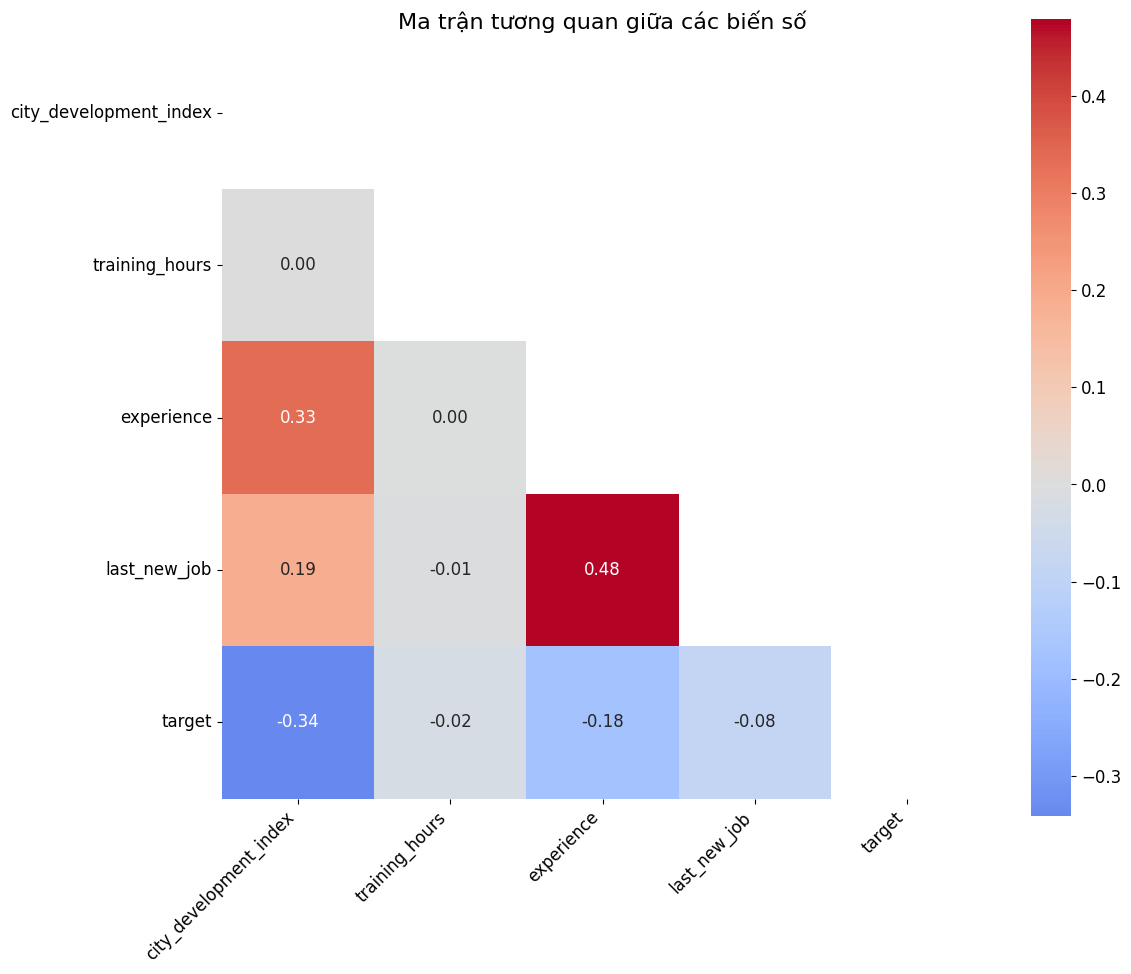


TƯƠNG QUAN VỚI BIẾN MỤC TIÊU:
   • city_development_index   :  -0.342 (mạnh, âm) → tiêu cực
   • training_hours           :  -0.022 (yếu, âm) → tiêu cực
   • experience               :  -0.177 (trung bình, âm) → tiêu cực
   • last_new_job             :  -0.083 (yếu, âm) → tiêu cực


In [8]:
def question_6_feature_correlations(data):
    """Câu hỏi 6: Mối tương quan giữa các biến"""
    print("\n" + "CÂU HỎI 6: MỐI TƯƠNG QUAN GIỮA CÁC BIẾN")
    print("-" * 50)
    
    # Chọn các biến numeric quan trọng
    important_numeric = ['city_development_index', 'training_hours', 'experience', 'last_new_job', 'target']
    valid_cols = []
    
    for col in important_numeric:
        if col in data.dtype.names and np.issubdtype(data[col].dtype, np.number):
            valid_cols.append(col)
    
    if len(valid_cols) >= 2:
        print("MA TRẬN TƯƠNG QUAN:")
        plot_correlation_heatmap(data, valid_cols)
        
        # Phân tích tương quan với target
        print("\nTƯƠNG QUAN VỚI BIẾN MỤC TIÊU:")
        if 'target' in valid_cols:
            for col in valid_cols:
                if col != 'target':
                    # Tính correlation
                    mask = ~(np.isnan(data[col]) | np.isnan(data['target']))
                    if np.sum(mask) > 1:
                        corr = np.corrcoef(data[col][mask], data['target'][mask])[0, 1]
                        
                        # Đánh giá mức độ tương quan
                        if abs(corr) > 0.3:
                            strength = "mạnh"
                        elif abs(corr) > 0.1:
                            strength = "trung bình" 
                        else:
                            strength = "yếu"
                        
                        direction = "dương" if corr > 0 else "âm"
                        interpretation = "tích cực" if corr > 0 else "tiêu cực"
                        print(f"   • {col:25}: {corr:7.3f} ({strength}, {direction}) → {interpretation}")

if train_data is not None:
    question_6_feature_correlations(train_data)

## Tổng kết và Insights

In [9]:
def generate_final_insights(data):
    """Tổng kết và Insights"""
    print("\n" + "="*70)
    print("TỔNG KẾT VÀ INSIGHTS")
    print("="*70)
    
    # Basic statistics
    target = data['target']
    change_rate = np.sum(target == 1) / len(target) * 100
    
    print("TỔNG QUAN DATASET:")
    print(f"   • Tổng số mẫu: {len(data):,}")
    print(f"   • Tỷ lệ đổi việc: {change_rate:.2f}%")
    print(f"   • Imbalance ratio: {np.sum(target==0)/np.sum(target==1):.2f}:1")
    
    print("\nINSIGHTS CHÍNH:")
    
    # Phân tích các features quan trọng
    numeric_cols = [col for col in data.dtype.names 
                   if np.issubdtype(data[col].dtype, np.number) 
                   and col not in ['target', 'enrollee_id']]
    
    significant_features = []
    for col in numeric_cols[:6]:
        result = statistical_hypothesis_test_numpy(data, col, 'target')
        if result and result['p_value'] < 0.05:
            significant_features.append((col, result['mean_difference']))
    
    if significant_features:
        print("   1. CÁC YẾU TỐ ẢNH HƯỞNG MẠNH:")
        for feat, diff in significant_features[:3]:
            direction = "CAO HƠN" if diff > 0 else "THẤP HƠN"
            print(f"      - {feat}: Người không đổi việc có giá trị {direction}")
    
    print("\n   2. VẤN ĐỀ CHÍNH:")
    print("      - Dataset có imbalance nghiêm trọng cần được xử lý")
    print("      - City Development Index có ảnh hưởng rõ rệt đến quyết định đổi việc")
    print("      - Kinh nghiệm làm việc và thời gian đào tạo có mối quan hệ phức tạp")

if train_data is not None:
    generate_final_insights(train_data)


TỔNG KẾT VÀ INSIGHTS
TỔNG QUAN DATASET:
   • Tổng số mẫu: 19,158
   • Tỷ lệ đổi việc: 24.93%
   • Imbalance ratio: 3.01:1

INSIGHTS CHÍNH:
   1. CÁC YẾU TỐ ẢNH HƯỞNG MẠNH:
      - city_development_index: Người không đổi việc có giá trị CAO HƠN
      - experience: Người không đổi việc có giá trị CAO HƠN
      - last_new_job: Người không đổi việc có giá trị CAO HƠN

   2. VẤN ĐỀ CHÍNH:
      - Dataset có imbalance nghiêm trọng cần được xử lý
      - City Development Index có ảnh hưởng rõ rệt đến quyết định đổi việc
      - Kinh nghiệm làm việc và thời gian đào tạo có mối quan hệ phức tạp
